In [16]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [17]:
#Read happiness and underweight CSVs 
happy16=pd.DataFrame(pd.read_csv('CSVs/Happiness_2016.csv'))
happy15=pd.DataFrame(pd.read_csv('CSVs/Happiness_2015.csv'))
underweight=pd.DataFrame(pd.read_csv('CSVs/underweight_adults.csv'))

underweight.head()

,Unnamed: 0,2016,2015
0,NaN,"Prevalence of underweight among adults, BMI < ...","Prevalence of underweight among adults, BMI < ..."
1,NaN,18+ years,18+ years
2,Country,Both sexes,Both sexes
3,Afghanistan,16.4 [10.3-23.2],16.7 [10.7-23.5]
4,Albania,1.3 [0.6-2.6],1.4 [0.6-2.6]


In [18]:
#Drop top three rows and rename columns of underweight dataframe
underweight=underweight.drop([0,1,2])
underweight=underweight.rename(columns={'Unnamed: 0':'Country'})
underweight.dtypes

Country    object
2016       object
2015       object
dtype: object

In [19]:
#Separate percent from estimate range 2016
un_split16 = underweight['2016'].str.split(' ', n=1, expand=True)
underweight['2016 Percent']=un_split16[0]
underweight.head()

,Country,2016,2015,2016 Percent
3,Afghanistan,16.4 [10.3-23.2],16.7 [10.7-23.5],16.4
4,Albania,1.3 [0.6-2.6],1.4 [0.6-2.6],1.3
5,Algeria,3.6 [2.0-5.9],3.8 [2.1-6.1],3.6
6,Andorra,0.8 [0.3-1.9],0.8 [0.3-1.9],0.8
7,Angola,13.7 [7.7-21.0],13.9 [7.9-21.1],13.7


In [20]:
#Separate percent from estimate range 2015
un_split15 = underweight['2015'].str.split(' ', n=1, expand=True)
underweight['2015 Percent']=un_split15[0]
underweight.head()

,Country,2016,2015,2016 Percent,2015 Percent
3,Afghanistan,16.4 [10.3-23.2],16.7 [10.7-23.5],16.4,16.7
4,Albania,1.3 [0.6-2.6],1.4 [0.6-2.6],1.3,1.4
5,Algeria,3.6 [2.0-5.9],3.8 [2.1-6.1],3.6,3.8
6,Andorra,0.8 [0.3-1.9],0.8 [0.3-1.9],0.8,0.8
7,Angola,13.7 [7.7-21.0],13.9 [7.9-21.1],13.7,13.9


In [21]:
#Narrow columns and drop blank and n/a rows
underweight=underweight[['Country','2016 Percent','2015 Percent']]
underweight=underweight.replace(r'^\s*$', np.nan, regex=True)
underweight=underweight.dropna(how='any')
underweight.head()

,Country,2016 Percent,2015 Percent
3,Afghanistan,16.4,16.7
4,Albania,1.3,1.4
5,Algeria,3.6,3.8
6,Andorra,0.8,0.8
7,Angola,13.7,13.9


In [22]:
#Find average percent underweight across 2 years
underweight['2016 Percent'] = pd.to_numeric(underweight['2016 Percent'], errors='coerce')
underweight['2015 Percent'] = pd.to_numeric(underweight['2015 Percent'], errors='coerce')
underweight['Mean Percent Underweight (2015 & 2016)']=((underweight['2016 Percent'] + underweight['2015 Percent'])/2)
underweight.head()

,Country,2016 Percent,2015 Percent,Mean Percent Underweight (2015 & 2016)
3,Afghanistan,16.4,16.7,16.55
4,Albania,1.3,1.4,1.35
5,Algeria,3.6,3.8,3.70
6,Andorra,0.8,0.8,0.80
7,Angola,13.7,13.9,13.80


In [23]:
#Merge happiness dataframes and narrow columns 
happy = pd.merge(happy16, happy15, on = 'Country', how = 'inner')
happy = happy[['Country', 'Happiness Score_x', 'Happiness Score_y']]
happy.head()

,Country,Happiness Score_x,Happiness Score_y
0,Denmark,7.526,7.527
1,Switzerland,7.509,7.587
2,Iceland,7.501,7.561
3,Norway,7.498,7.522
4,Finland,7.413,7.406


In [28]:
#Calculate average happiness across 2 years and merge with underweight data, dropping blanks and n/a rows
happy['Average Happiness (2015 & 2016)'] = ((happy['Happiness Score_x'] + happy['Happiness Score_y'])/2)
happy_underweight = pd.merge(happy, underweight, on='Country', how='inner')
happy_underweight=happy_underweight.replace(r'^\s*$', np.nan, regex=True)
happy_underweight=happy_underweight.dropna(how='any')
happy_underweight.head()

,Country,Happiness Score_x,Happiness Score_y,Average Happiness (2015 & 2016),2016 Percent,2015 Percent,Mean Percent Underweight (2015 & 2016)
0,Denmark,7.526,7.527,7.5265,1.7,1.7,1.7
1,Switzerland,7.509,7.587,7.5480,1.9,1.9,1.9
2,Iceland,7.501,7.561,7.5310,1.1,1.1,1.1
3,Norway,7.498,7.522,7.5100,1.0,1.0,1.0
4,Finland,7.413,7.406,7.4095,0.8,0.8,0.8


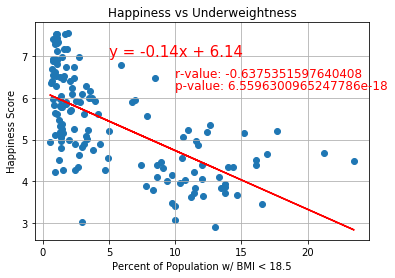

R-value: -0.6375351597640408, P-value: 6.5596300965247786e-18


In [29]:
#Linear Regression!
y_values=happy_underweight['Average Happiness (2015 & 2016)']
x_values=happy_underweight['Mean Percent Underweight (2015 & 2016)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Happiness vs Underweightness')
plt.xlabel('Percent of Population w/ BMI < 18.5')
plt.ylabel('Happiness Score')
r_value=(f"r-value: {rvalue}")
p_value=(f"p-value: {pvalue}")
plt.annotate(line_eq,(5,7),fontsize=15,color="red")
plt.annotate(r_value,(10,6.5),fontsize=12,color="red")
plt.annotate(p_value,(10,6.2),fontsize=12,color="red")
plt.grid()
plt.savefig('Images/underweight.png')
plt.show()
print(f"R-value: {rvalue}, P-value: {pvalue}")

In [30]:
#Moderate negative correlation
len(happy_underweight)

145

In [33]:
#Import data with ISO country codes, merge with happiness and underweight data
iso=pd.read_csv('csvs/country_iso.csv')
iso=iso.drop(['Unnamed: 0'], axis=1)
iso2 = pd.merge(happy_underweight, iso, on='Country', how='inner')
iso2=iso2[['iso_a3','Average Happiness (2015 & 2016)', 'Mean Percent Underweight (2015 & 2016)']]
iso2.head()

,iso_a3,Average Happiness (2015 & 2016),Mean Percent Underweight (2015 & 2016)
0,DNK,7.5265,1.7
1,CHE,7.5480,1.9
2,ISL,7.5310,1.1
3,NOR,7.5100,1.0
4,FIN,7.4095,0.8


In [34]:
#Import dataset with geographical info for graphing
import geopandas 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = pd.merge(world, iso2, on='iso_a3', how='inner')
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Average Happiness (2015 & 2016),Mean Percent Underweight (2015 & 2016)
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",3.7235,11.40
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7.4155,1.10
2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",7.1115,1.10
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",5.8870,2.85
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",5.9950,3.50


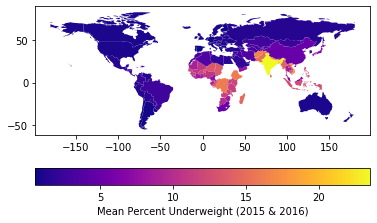

In [35]:
#chorograph of percent underweight
fig, ax = plt.subplots(1,1)
world.plot(column='Mean Percent Underweight (2015 & 2016)', cmap='plasma', ax=ax, legend=True, 
           legend_kwds={'label': "Mean Percent Underweight (2015 & 2016)", 'orientation': "horizontal"})

plt.savefig('Images/percent_underweight_map.png')